In [1]:
import sys
from functools import partial
from zipfile import ZipFile
import pandas as pd
sys.path.append('../src')
%matplotlib inline

# Your contact details

In [2]:
# If you're having problem importing this file, copy and paste the contents of "uatt.py" in this cell instead
# of the import statement
from uatt import submit
my_submit = partial(submit, "Uri Goren", "Company", "uri@uatt.org.il", "050")

# Read data

In [3]:
data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
        content = z.read(fname).decode('utf8')
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content,))
df_train = pd.DataFrame(data, columns=("id", "label", "content"))
df_train.sample(10)

id       label                                            content
36    00370         SPA  Exhibit 99.1\n\n\n\n1\. Purchase and Sale. By ...
2793  21770         rsu  Exhibit 10.6 \n\nPEPCO HOLDINGS, INC. \n\n\n\n...
2953  23370         rsu  Exhibit 10.22 \n\n\n\nTHIS AGREEMENT, executed...
1222  07450  employment  Exhibit 10.7\n\n\n\nTHIS EMPLOYMENT AGREEMENT ...
2256  38540         rra  Exhibit 10.22\n\n\n\nREGISTRATION RIGHTS AGREE...
1718  12410  employment  Exhibit 10.2 \n\n\n\nTHIS EMPLOYMENT AGREEMENT...
3464  28480         rsu  Exhibit 10.46 \n\nBurlington Holdings, Inc.\n\...
1178  07010  employment  EXHIBIT 10.15\n\n  \n\n\n\n\nTHIS EMPLOYMENT A...
4000  33840         rsu  ##### \n\nEXHIBIT 10.2\n\nANIMAS CORPORATION\n...
2466  18500         rsu  Exhibit 10.5\n\nTIER REIT, INC.\n\n\n\nName of...

In [4]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')
        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,))
df_test = pd.DataFrame(data, columns=("id", "content"))
df_test.sample(10)

id                                            content
114  ebisd  Exhibit 10.4\n\n\n\nAGREEMENT effective Januar...
407  mycsp  Exhibit 10.22\n\nALLIANCE IMAGING, INC.\n\n\n\...
222  hbgwd  Exhibit 10.7\n\nRETAIL OPPORTUNITY INVESTMENTS...
177  furdn  Exhibit 10.1 \n\n\n\nTHIS CREDIT AGREEMENT (as...
198  gncov  Exhibit 10.4 \n\nALERE INC.  \n2010 STOCK OPTI...
126  eosaj  EXHIBIT 10.1  \n\n\nCosi, Inc.\n\n\n\nTHIS EMP...
586  sxbvu  ##### \n\nExhibit 10.39\n\n[CEO]\n\nCOLOR KINE...
19   aroji  Exhibit 10.2\n\n  \n\n\nBAKER HUGHES INCORPORA...
799  zldcp    \n\n\nExhibit 3.1\n\n\n\nOF\n\nEQUITABLE FIN...
665  vmkld  Exhibit 3.1 \n\n\n\nof Bronco Drilling Company...

# Plot distribution of labels

<AxesSubplot:>

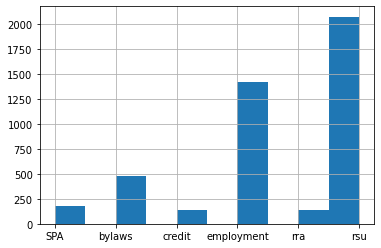

In [5]:
df_train["label"].hist()

# Submit
## Sample submission 1: "All RSU"

In [6]:
# for all documents
df_test["label"] = "rsu"
submission = dict(df_test[["id","label"]].values)
#submission name must be unique
submission_name = "uri_most_likely"
my_submit(submission_name, submission)


0.46958637469586

## Sample submission 2: Submission by string search


In [7]:
df_test["label"] = "rsu"
df_test.loc[df_test["content"].str.contains("EMPLOYMENT"),"label"] = 'employment'
df_test.loc[df_test["content"].str.contains("CREDIT"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("BYLAWS"),"label"] = 'bylaws'
df_test.loc[df_test["content"].str.contains("REGISTRAR"),"label"] = 'rra'
submission = dict(df_test[["id","label"]].values)

submission_name = "uri_string_search"
my_submit(submission_name, submission)

0.65085158150852

# See how you rank
Leaderboard is available at:
https://goren.ml/uattcontract

Accuracy of **90%** and above is required to pass the test

## Leaderboard not refreshing ?
try adding a random suffix to it, like this one:

In [8]:
import random, string
from IPython.display import HTML
rand_str = lambda: "".join(random.sample(string.ascii_letters,7))
HTML('<a href="https://goren.ml/uattcontract/?{k}={v}" target="_blank">Go to Leaderboard</a>'.format(k=rand_str(),v=rand_str()))